In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


## Carga y exploración de datos

In [27]:
df = sns.load_dataset("titanic")
df['survived'] = df['survived'].astype('category')
df2 = df[["survived","class", "embark_town", "alone" ,"adult_male"]].dropna()

df2.head()

,survived,class,embark_town,alone,adult_male
0,0,Third,Southampton,False,True
1,1,First,Cherbourg,False,False
2,1,Third,Southampton,True,False
3,1,First,Southampton,False,False
4,0,Third,Southampton,True,True


In [29]:
df3 = pd.get_dummies(df2, drop_first=True)#.drop('survived_0',axis=1)
df3 = df3.rename(columns={"survived_1": "survived"})
df3.head()

,alone,adult_male,survived,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,False,True,False,False,True,False,True
1,False,False,True,False,False,False,False
2,True,False,True,False,True,False,True
3,False,False,True,False,False,False,True
4,True,True,False,False,True,False,True


## Entrenamiento del modelo

In [30]:
df_train, df_test = train_test_split(df3, test_size=0.2, random_state=1234, stratify=df3["survived"])

X_train = df_train.drop("survived", axis=1)
y_train = df_train["survived"]
X_test = df_test.drop("survived", axis=1)
y_test = df_test["survived"]

In [47]:
tree = DecisionTreeClassifier(
    criterion="entropy",      # Metrica para evaluar divisiones: "gini", "entropy", "log_loss"
    max_depth=5,           # Profundidad máxima del árbol
    min_samples_split=10,   # Mínimo de muestras para dividir un nodo
    min_samples_leaf=5,    # Mínimo de muestras en una hoja
    random_state=1234
)
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=1234)

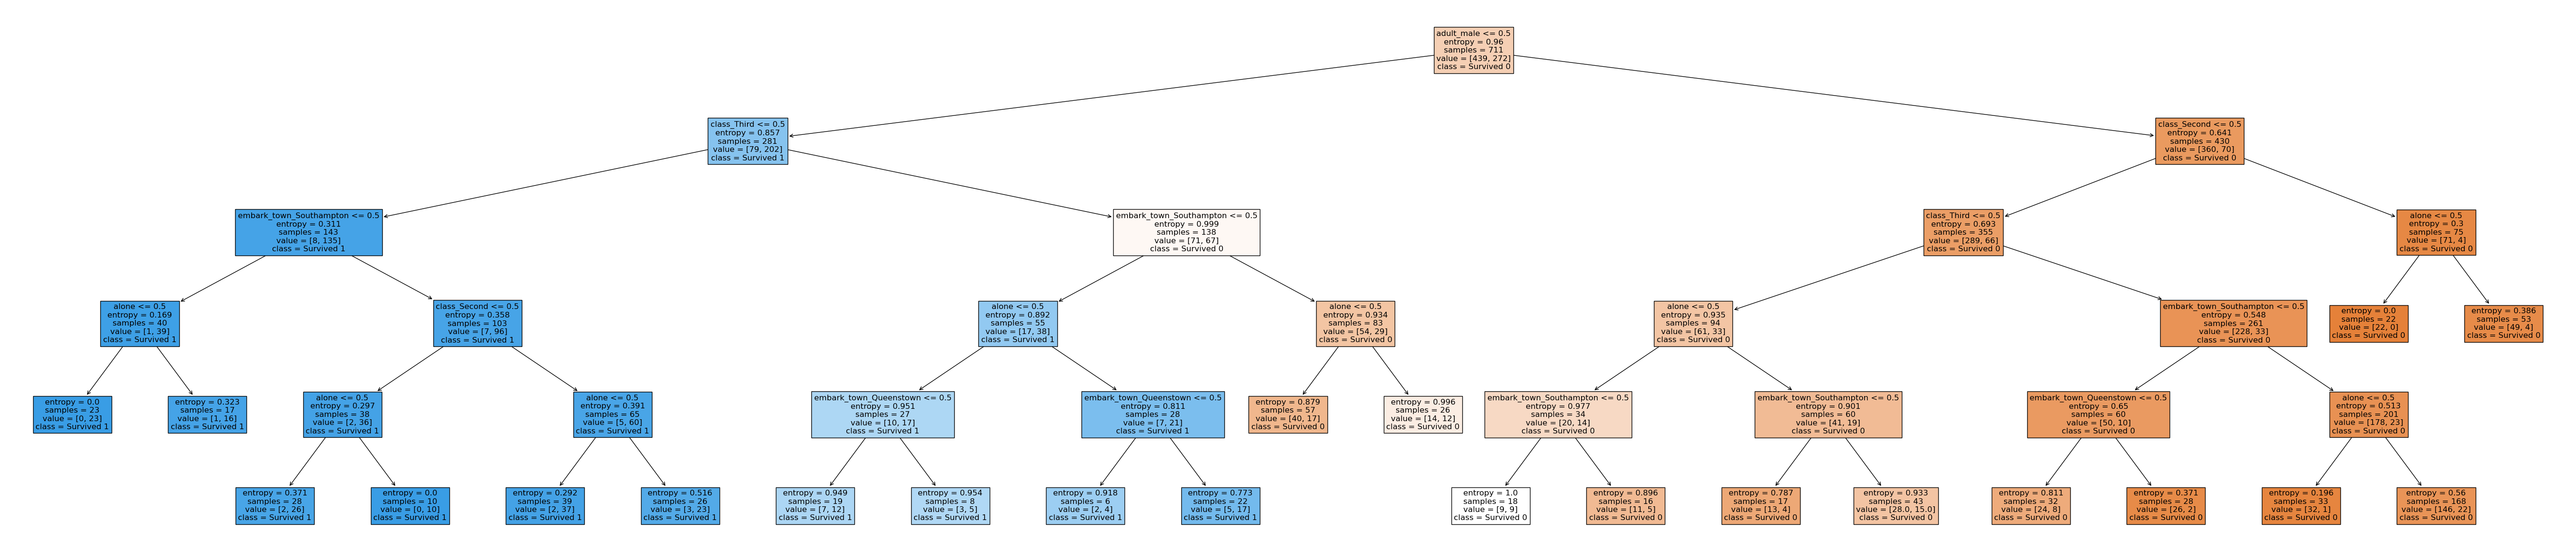

In [48]:
## Visualización del arbol
plt.figure(figsize=(70, 15))  
plot_tree(tree, feature_names=X_train.columns, class_names=["Survived 0", "Survived 1"], filled=True,fontsize=12)
plt.show()

## Left = True, Right = False

## Evaluación del modelo

In [49]:
## Predicciones con el dataset de test
y_pred = tree.predict(X_test)

## Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix,  
                              index=["Actual: 0", "Actual: 1"],  
                              columns=["Predicted: 0", "Predicted: 1"])
display(conf_matrix_df)

## Métricas del modelo
print(classification_report(y_test, y_pred))

,Predicted: 0,Predicted: 1
Actual: 0,103,7
Actual: 1,29,39


              precision    recall  f1-score   support

       False       0.78      0.94      0.85       110
        True       0.85      0.57      0.68        68

    accuracy                           0.80       178
   macro avg       0.81      0.75      0.77       178
weighted avg       0.81      0.80      0.79       178

